중간고사: 컴퓨터 비전 문제
목표: 간단한 컨볼루션 신경망(CNN)을 사용하여 이미지 분류 작업을 수행합니다. 이 과제에서는 Fashion-MNIST 데이터셋을 사용합니다. Pytorch로 구현하세요.

    Python 환경 : Python 3.10.13

1. 환경 구축
- PyTorch와 컴퓨터 비전 관련 패키지들을 설치
- 필요한 스크립트 파일을 다운로드

In [9]:
# pytorchcv.py 파일을 다운로드하기 위해 wget 명령어를 사용할 수 없으므로, 직접 다운로드 링크를 제공합니다.
# 이하의 코드는 pytorchcv.py 파일을 다운로드하는 목적입니다.
!wget https://raw.githubusercontent.com/MicrosoftDocs/pytorchfundamentals/main/computer-vision-pytorch/pytorchcv.py

# torchvision 패키지 설치를 위한 pip 명령어입니다.
%pip install torchvision

# torchinfo 패키지 설치를 위한 pip 명령어입니다.
%pip install torchinfo

# pytorchcv 패키지 설치를 위한 pip 명령어입니다.
%pip install pytorchcv

# torchsummary 패키지 설치를 위한 pip 명령어입니다.
%pip install torchsummary



--2024-04-24 21:15:39--  https://raw.githubusercontent.com/MicrosoftDocs/pytorchfundamentals/main/computer-vision-pytorch/pytorchcv.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6540 (6.4K) [text/plain]
Saving to: ‘pytorchcv.py.2’

pytorchcv.py.2      100%[===================>]   6.39K  --.-KB/s    in 0s      

2024-04-24 21:15:39 (27.7 MB/s) - ‘pytorchcv.py.2’ saved [6540/6540]

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


1. 데이터셋 불러오기

In [10]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# FashionMNIST 데이터셋 불러오기





import torchvision.datasets as datasets

# Fashion MNIST 데이터셋 불러오기
train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=None)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=None)

# DataLoader 설정
BATCH_SIZE = 64  # 예시로 64로 설정
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

# torchvision.transforms.Compose를 사용하여 이미지 변환을 연결하는데, 여기서는 이미지를 Tensor로 변환합니다.
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor()
])

# FashionMNIST 학습 데이터셋을 불러와서 trainset 변수에 저장합니다.
# root는 데이터셋이 저장될 디렉토리를 지정하고, train은 학습 데이터셋을 의미합니다.
# download=True로 설정하여 데이터셋을 인터넷에서 다운로드합니다.
# transform 매개변수에 위에서 정의한 이미지 변환을 적용합니다.
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)

# FashionMNIST 테스트 데이터셋을 불러와서 testset 변수에 저장합니다.
# train=False로 설정하여 테스트 데이터셋을 불러옵니다.
testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

# DataLoader 생성
batch_size = 64
# trainloader는 학습 데이터셋을 미니배치로 제공하는 DataLoader입니다.
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
# testloader는 테스트 데이터셋을 미니배치로 제공하는 DataLoader입니다.
# shuffle=False로 설정하여 테스트 데이터셋을 섞지 않습니다.
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)
# DataLoader 설정
# 테스트 데이터 로드 및 전처리
test_data = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

# 클래스 레이블을 정의합니다.
# FashionMNIST의 클래스는 다음과 같은 순서로 정의됩니다: 'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
# 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 데이터셋 크기를 확인하여 학습 데이터셋과 테스트 데이터셋의 크기를 출력합니다.
print("학습 데이터셋 크기:", len(trainset))
print("테스트 데이터셋 크기:", len(testset))


학습 데이터셋 크기: 60000
테스트 데이터셋 크기: 10000


2. 이미지 시각화


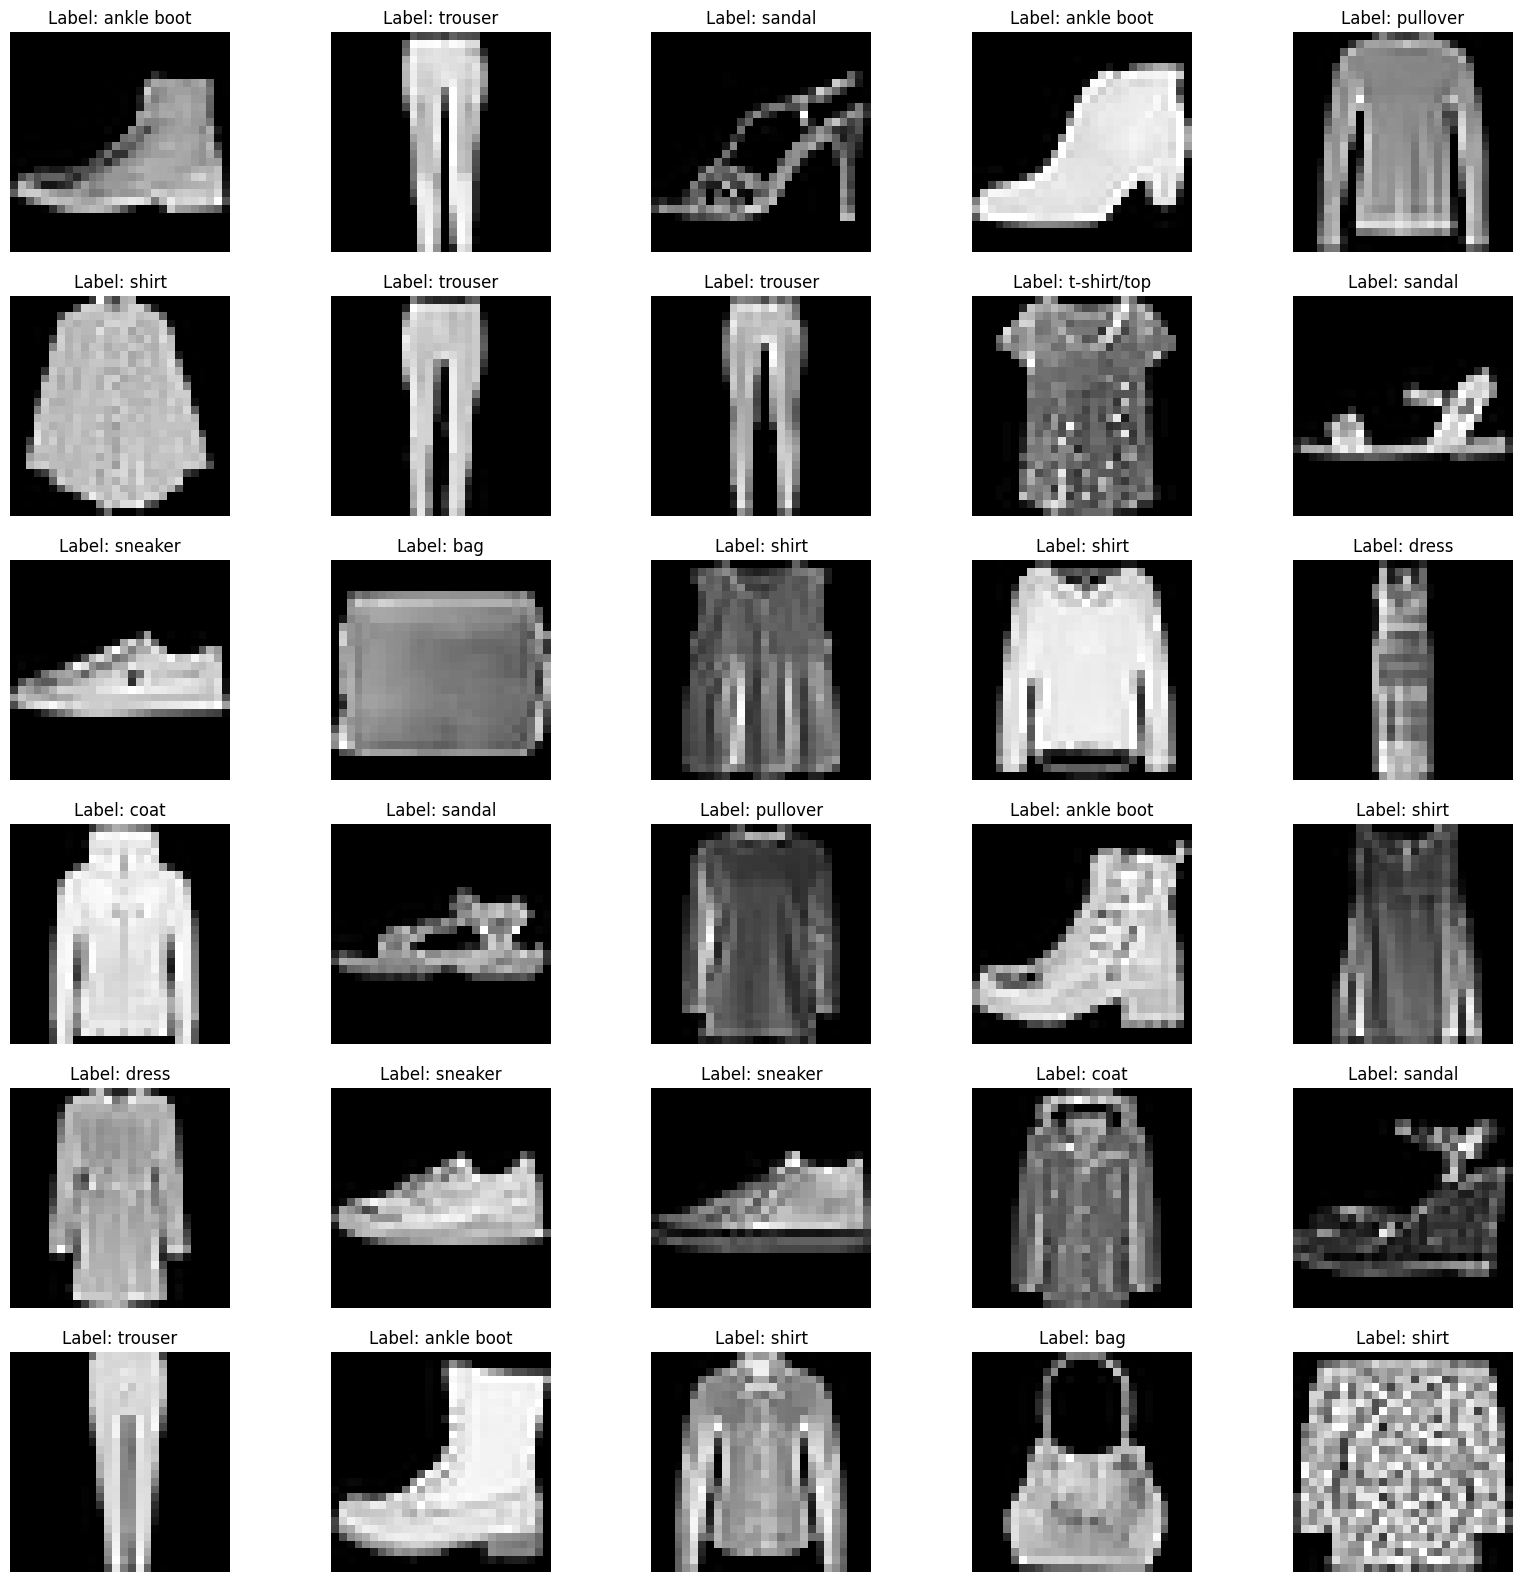

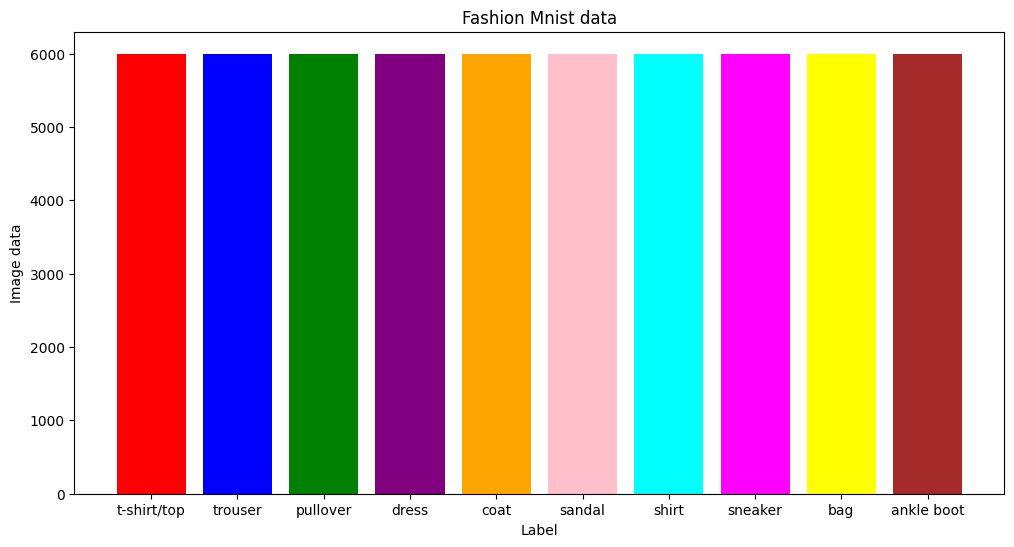

{9: 6000, 0: 6000, 3: 6000, 2: 6000, 7: 6000, 5: 6000, 1: 6000, 6: 6000, 4: 6000, 8: 6000}


In [11]:
# 이미지 데이터에 저장되어 있는 종류를 출력하기 전에 레이블을 공식 데이터에 따라 정의
labels_map = { 0: "t-shirt/top", 1: "trouser", 2: "pullover", 3: "dress", 4: "coat", 5: "sandal", 6: "shirt", 7: "sneaker", 8: "bag", 9: "ankle boot"}

# 1). cmap을 통해 이미지 데이터 중 랜덤으로 뽑아 종류에 대한 확인
# 하단의 cmap을 통해서 확인하면 데이터는 gray 이미지로 구성되어 있음을 확인 가능하다. 

figure = plt.figure(figsize=(20, 20)) #사이즈를 20, 20으로 지정
cols, rows = 5, 6 #5행 6열 구성으로 총 30개의 샘플 데이터가 출력될 것임.

for i in range(1, cols * rows + 1): # 위에서 지정한 배열에 맞게 30개의 샘플 데이터를 출력함
    sample_idx = torch.randint(len(trainset), size=(1,)).item() #torch의 randint를 이용해 랜덤한 인덱스 하나를 선택함
    img, label = trainset[sample_idx] #trainset에 sample_idx에 해당하는 이미지와 레이블을 가져옴
    
    figure.add_subplot(rows, cols, i) # 순서대로 이미지와 레이블을 추가함
    plt.title(f"Label: {labels_map[label]}") # 레이블 명을 이미지 위에 추가 (위에서 정의한 레이블 명을 해당하는 것을 찾아서 추가)
    plt.axis("off") # 세부적인 눈금이나 필요없는 것들은 지워버림
    plt.imshow(img.squeeze(), cmap="gray") # 이미지를 보여주며, gray 이미지로 표시함.

plt.show() # 이미지 보기

# 2). data_train을 lable의 종류에 따라 데이터양을 확인해보기
# data_train 내부에 image와 label이 함께 있기 때문에 반복문을 통해 image와 lable을 검사하며 0부터 시작하여 9까지의 레이블에 해당하는 이미지를 찾을 경우 count를 진행하여 하단의 label_counts에 저장을 진행함
# 1. label_count 진행
# 2. label_count를 sort를 진행하여 0 ~ 9까지 순서대로 정렬
# 3. labels에 기존에 정의해둔 레이블 명칭을 더하여 리스트화 시킴
# 4. counts에는 label_count에 저장해둔 이미지 데이터의 수를 리스트화 시킴
# 5. plt를 통해 막대 그래프로 데이터의 갯수를 시각화하여 출력함

label_counts = {}  # 0 ~ 9
# trainset에서 이미지와 레이블을 순회하며 이미지 데이터의 양을 count하여 label_counts에 저장함
for image, label in trainset: #image와 label를 각 trainset의 모든 데이터를 돌며 뽑아냄
    if label in label_counts: # label이 label_count에 저장된 값이 해당될 경우
        label_counts[label] += 1  # 이미지 갯수 +1
    else:  # 이미지 데이터에 해당하는 레이블이 label_counts에 없으면
        label_counts[label] = 1  # 해당하는 이미지 레이블 값의 키를 새로 만들어서 추가함

# 레이블별 이미지 데이터 수를 key로 두고 정렬을 진행하여 딕셔너리로 만들어 sorted_label_counts에 저장함
sorted_label_counts = dict(sorted(label_counts.items()))

# 정렬된 상태의 딕셔너리의 키값과 value를 뽑아서 시각화를 위해 따로 빼서 저장을 진행함
labels = [labels_map[label] for label in sorted_label_counts.keys()]  # 레이블의 이름은 위에서 정의해둔 labels_map에서 해당하는 값을 가져와 바꿔서 저장함
counts = list(sorted_label_counts.values())  # 이미지 데이터 수를 저장함

# 막대 그래프 그리기
plt.figure(figsize=(12, 6))  # 그래프 크기 지정
colors = ['red', 'blue', 'green', 'purple', 'orange', 'pink', 'cyan', 'magenta', 'yellow', 'brown'] # 각 막대의 색상 지정
plt.bar(labels, counts, color=colors)  # 막대 그래프 (각 레이블에 대해 다른 색상 적용)
plt.xlabel('Label')  # x축 이름
plt.ylabel('Image data')  # y축 이름
plt.title('Fashion Mnist data')  # 그래프 제목
plt.show() # 그래프 출력

# 레이블에 해당하는 이미지 데이터의 갯수 출력
print(label_counts)

3. 간단한 CNN 모델을 구축

In [12]:
BATCH_SIZE = 32  # 배치 크기 설정

# 테스트 데이터로더 설정
test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=BATCH_SIZE, shuffle=True
)

# LeNet 모델 정의
class LeNet(nn.Module):
    # 초기화 메서드
    def __init__(self):
        super(LeNet, self).__init__()
        # Convolution Layer 정의
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5) # 입력 채널: 1, 출력 채널: 6, 커널 크기: 5x5
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5) # 입력 채널: 6, 출력 채널: 16, 커널 크기: 5x5
        self.fc1 = nn.Linear(in_features=256, out_features=120)  # 입력 특징 맵 크기: 256, 출력 특징 맵 크기: 120
        self.fc2 = nn.Linear(in_features=120, out_features=84)  # 입력 특징 맵 크기: 120, 출력 특징 맵 크기: 84
        self.fc3 = nn.Linear(in_features=84, out_features=10)   # 입력 특징 맵 크기: 84, 출력 특징 맵 크기: 10 (클래스 수)

    # 순전파 메서드
    def forward(self, x):
        # Convolution 및 Pooling Layer를 통과시키는 과정
        x = F.relu(self.conv1(x))  # 1번째 Convolution Layer를 통과한 결과에 ReLU 활성화 함수 적용
        x = F.max_pool2d(x, kernel_size=2)  # 2x2 크기의 Max Pooling 수행
        x = F.relu(self.conv2(x))  # 2번째 Convolution Layer를 통과한 결과에 ReLU 활성화 함수 적용
        x = F.max_pool2d(x, kernel_size=2)  # 2x2 크기의 Max Pooling 수행

        # Fully Connected Layer를 통과시키는 과정
        x = x.view(x.size(0), -1)  # 2차원의 Feature Map을 1차원으로 평탄화(flattening)
        x = F.relu(self.fc1(x))  # 1번째 Fully Connected Layer를 통과한 결과에 ReLU 활성화 함수 적용
        x = F.relu(self.fc2(x))  # 2번째 Fully Connected Layer를 통과한 결과에 ReLU 활성화 함수 적용

        # 마지막 Fully Connected Layer를 통과한 결과 반환
        x = self.fc3(x)  # 출력 레이어를 통과한 결과 반환
        return x

# LeNet 모델의 인스턴스 생성
net = LeNet()

# 모델의 구조 출력
print(net)


LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=256, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


4. 모델의 CUDA 사용 여부 확인 및 구조 출력

In [13]:
# CUDA 사용이 가능할 시, GPU를 이용해서 진행
if torch.cuda.is_available():
    # CUDA 사용 가능한 경우
    # CUDA 장치로 이동
    device = torch.device("cuda:0")
    net = net.to(device)
    print("모델을 CUDA 장치로 이동했습니다.")
else:
    # CUDA 사용이 불가능한 경우
    device = torch.device("cpu")
    print("CUDA를 사용할 수 없습니다. CPU로 진행합니다.")

# 모델 구조 출력
print(net)


CUDA를 사용할 수 없습니다. CPU로 진행합니다.
LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=256, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


5. 모델 및 하이퍼파라미터 설정

In [14]:
# CUDA 사용 가능한 경우 GPU로 모델 이동
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net.to(device)

# 손실 함수 및 옵티마이저 설정
LEARNING_RATE = 0.001  # 학습률 설정

# 손실 함수 및 옵티마이저 설정
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=LEARNING_RATE, momentum=0.9)


6. 훈련 함수 및 결과 반환

In [15]:
transform = transforms.Compose([
    transforms.ToTensor(),
    # 다른 필요한 변환들을 여기에 추가할 수 있습니다.
])

# 훈련 데이터셋 및 데이터로더 설정
train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

# 테스트 데이터셋 및 데이터로더 설정
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

import time

def calculate_accuracy(model, data_loader):
    # 모델의 정확도 계산
    correct = 0
    total = 0
    with torch.no_grad():
        for data in data_loader:
            inputs, labels = data[0].to(device), data[1].to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return correct / total

# 정확도 계산 함수
def calc_acc(loader):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in loader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return (100 * correct / total)

# 훈련 함수
def training(NUM_EPOCHS):
    epoch_loss = []  # 각 에폭의 훈련 손실 기록
    train_acc = []   # 훈련 정확도 기록
    test_acc = []    # 테스트 정확도 기록
    test_losses = [] # 테스트 손실 기록

    for epoch in range(NUM_EPOCHS):
        running_loss = 0.0
        running_test_loss = 0.0

        # 훈련 데이터로 모델 훈련
        for i, data in enumerate(train_loader, 0):
            inputs, labels = data[0].to(device), data[1].to(device)
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = loss_fn(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        # 테스트 데이터로 손실 및 정확도 계산
        with torch.no_grad():
            for data in test_loader:
                inputs, labels = data[0].to(device), data[1].to(device)
                outputs = net(inputs)
                test_loss = loss_fn(outputs, labels)
                running_test_loss += test_loss.item()

        # 손실과 정확도 기록
        epoch_loss.append(running_loss / len(train_loader))
        test_losses.append(running_test_loss / len(test_loader))
        train_acc.append(calc_acc(train_loader))
        test_acc.append(calc_acc(test_loader))

        # 결과 출력
        print('Epoch: %d/%d, Train Accuracy: %.2f%%, Test Accuracy: %.2f%%, Training Loss: %.4f, Testing Loss: %.4f' %
              (epoch+1, NUM_EPOCHS, train_acc[epoch], test_acc[epoch], epoch_loss[epoch], test_losses[epoch]))

    return epoch_loss, train_acc, test_acc, test_losses

# 훈련 및 결과 반환
NUM_EPOCHS = 10  # 예시로 10으로 설정
start = time.time()  # 훈련 시작 시간 기록
epoch_loss, train_acc, test_acc, test_losses = training(NUM_EPOCHS)
end = time.time()  # 훈련 종료 시간 기록

# 소요 시간 출력
print("Training Time: %.2f Minutes" % ((end-start)/60))


Epoch: 1/10, Train Accuracy: 68.11%, Test Accuracy: 67.00%, Training Loss: 1.8519, Testing Loss: 0.9210
Epoch: 2/10, Train Accuracy: 76.95%, Test Accuracy: 75.92%, Training Loss: 0.6941, Testing Loss: 0.6281
Epoch: 3/10, Train Accuracy: 80.23%, Test Accuracy: 79.51%, Training Loss: 0.5685, Testing Loss: 0.5522
Epoch: 4/10, Train Accuracy: 81.64%, Test Accuracy: 80.74%, Training Loss: 0.5033, Testing Loss: 0.5195
Epoch: 5/10, Train Accuracy: 84.29%, Test Accuracy: 83.41%, Training Loss: 0.4650, Testing Loss: 0.4651
Epoch: 6/10, Train Accuracy: 84.06%, Test Accuracy: 83.37%, Training Loss: 0.4356, Testing Loss: 0.4697
Epoch: 7/10, Train Accuracy: 85.56%, Test Accuracy: 84.72%, Training Loss: 0.4118, Testing Loss: 0.4216
Epoch: 8/10, Train Accuracy: 86.37%, Test Accuracy: 85.62%, Training Loss: 0.3894, Testing Loss: 0.4030
Epoch: 9/10, Train Accuracy: 86.72%, Test Accuracy: 85.87%, Training Loss: 0.3718, Testing Loss: 0.3936
Epoch: 10/10, Train Accuracy: 87.07%, Test Accuracy: 85.89%, Tra

7. 모델 평가 및 잘못 분류된 이미지 식별

In [16]:
def evaluate_model(model, test_loader):
    device = next(model.parameters()).device  # 모델이 사용하는 디바이스를 가져옵니다.
    model.eval()  # 모델을 평가 모드로 설정합니다. 이제는 학습이 아니라 성능을 평가할 차례에요.
    correct = 0  # 맞은 예측 수를 세는 변수를 만듭니다.
    total = 0  # 전체 이미지 수를 세는 변수를 만듭니다.
    misclassified_images = []  # 잘못 분류된 이미지를 저장할 리스트를 만듭니다.
    misclassified_labels = []  # 잘못 분류된 이미지의 실제 레이블을 저장할 리스트를 만듭니다.
    misclassified_predictions = []  # 잘못 분류된 이미지의 예측된 레이블을 저장할 리스트를 만듭니다.

    with torch.no_grad():  # 이제는 그라디언트를 계산하지 않을 거에요.
        for images, labels in test_loader:  # 테스트 데이터로더를 사용하여 이미지와 레이블을 하나씩 가져옵니다.
            images, labels = images.to(device), labels.to(device)  # 이미지와 레이블을 GPU 또는 CPU로 옮깁니다.
            outputs = model(images)  # 모델에 이미지를 넣고 예측을 얻습니다.
            _, predicted = torch.max(outputs.data, 1)  # 가장 높은 값을 가진 예측을 선택합니다.
            total += labels.size(0)  # 전체 이미지 수를 늘립니다.
            correct += (predicted == labels).sum().item()  # 맞은 예측 수를 늘립니다.

            # 잘못 분류된 이미지를 식별합니다.
            misclassified_mask = predicted != labels  # 예측과 실제 레이블이 다른지 확인하는 마스크를 만듭니다.
            # 잘못 분류된 이미지, 실제 레이블, 예측된 레이블을 리스트에 추가합니다.
            misclassified_images.extend(images[misclassified_mask].cpu().numpy())
            misclassified_labels.extend(labels[misclassified_mask].cpu().numpy())
            misclassified_predictions.extend(predicted[misclassified_mask].cpu().numpy())

    accuracy = 100 * correct / total  # 정확도를 계산합니다.
    return accuracy, misclassified_images, misclassified_labels, misclassified_predictions  # 정확도와 잘못 분류된 이미지 정보를 반환합니다.

# 모델 평가 및 잘못 분류된 이미지 식별
accuracy, misclassified_images, misclassified_labels, misclassified_predictions = evaluate_model(net, test_loader)
print(f"Final Accuracy: {accuracy:.2f}%")  # 최종 정확도를 출력합니다.


Final Accuracy: 85.89%


8. 학습결과 그래프

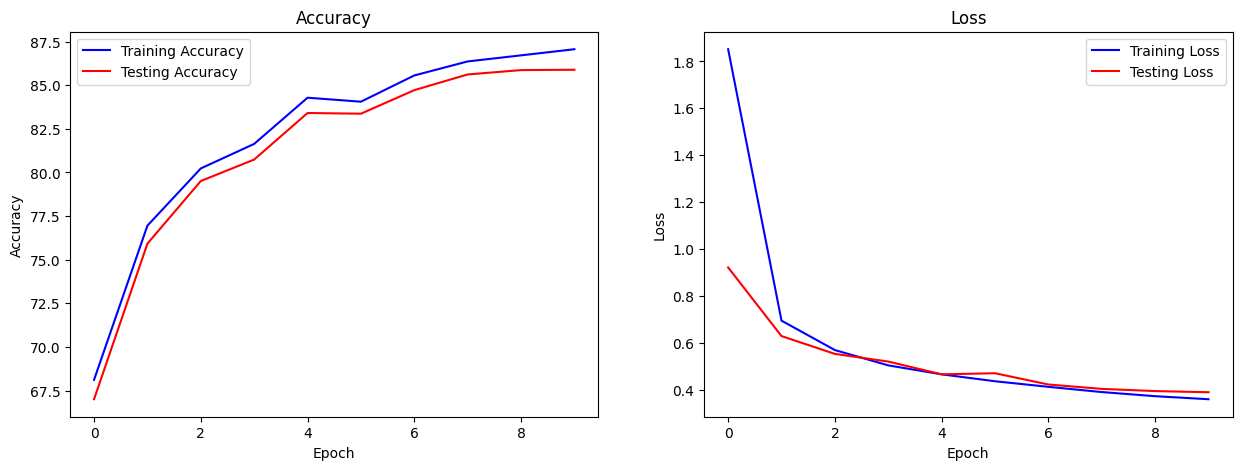

In [17]:
import matplotlib.pyplot as plt

# 그래프 그리기
plt.figure(figsize=(15, 5))

# Accuracy 그래프
plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Training Accuracy', color='blue')  # 훈련 정확도를 파란색으로 표시합니다.
plt.plot(test_acc, label='Testing Accuracy', color='red')  # 테스트 정확도를 빨간색으로 표시합니다.
plt.xlabel('Epoch')  # x축 레이블 설정
plt.ylabel('Accuracy')  # y축 레이블 설정
plt.title('Accuracy')  # 그래프 제목 설정
plt.legend()  # 범례 추가

# Loss 그래프
plt.subplot(1, 2, 2)
plt.plot(epoch_loss, label='Training Loss', color='blue')  # 훈련 손실을 파란색으로 표시합니다.
plt.plot(test_losses, label='Testing Loss', color='red')  # 테스트 손실을 빨간색으로 표시합니다.
plt.xlabel('Epoch')  # x축 레이블 설정
plt.ylabel('Loss')  # y축 레이블 설정
plt.title('Loss')  # 그래프 제목 설정
plt.legend()  # 범례 추가

plt.show()  # 그래프를 출력합니다.


9. 잘못 분류된 이미지들을 분석하고, 어떤 클래스가 모델에 의해 가장 잘못 분류되었는지를 식별합니다.

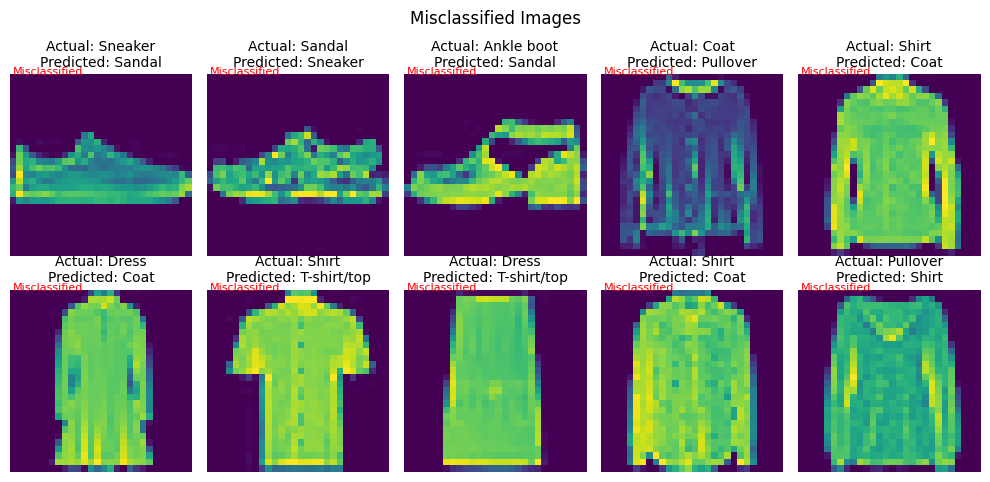

In [18]:
# 잘못 분류된 이미지 및 정확한 레이블 및 예측된 레이블 저장용 리스트
misclassified_images = []  # 잘못 분류된 이미지 저장 리스트
correct_labels = []  # 정확한 레이블 저장 리스트
predicted_labels = []  # 예측된 레이블 저장 리스트

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        for i in range(len(predicted)):
            if predicted[i] != labels[i]:
                misclassified_images.append(images[i])
                correct_labels.append(labels[i].item())
                predicted_labels.append(predicted[i].item())

# 잘못 분류된 이미지 시각화 및 분석
fig, axs = plt.subplots(2, 5, figsize=(10, 5))
fig.suptitle('Misclassified Images')

for i in range(min(len(misclassified_images), 10)):  # 최대 10개의 이미지만 표시
    # 이미지의 차원 확인 및 변환
    mis_img = misclassified_images[i].squeeze()  # 이미지 차원 축소
    if len(mis_img.shape) == 2:  # 2차원 이미지인 경우 (C, H, W) 형태로 변경
        mis_img = mis_img.unsqueeze(0)
    mis_img = mis_img.permute(1, 2, 0)  # 이미지 차원 순서 변경 (H, W, C)
    mis_img = mis_img / 2 + 0.5  # 이미지를 [0,1] 범위로 변환

    # 이미지 시각화
    axs[i // 5, i % 5].imshow(mis_img)  # 이미지 표시
    axs[i // 5, i % 5].axis('off')  # 축 제거

    # 실제 클래스 레이블과 예측된 클래스 레이블 출력
    actual_class = classes[correct_labels[i]]
    predicted_class = classes[predicted_labels[i]]
    axs[i // 5, i % 5].set_title(f'Actual: {actual_class}\nPredicted: {predicted_class}', fontsize=10)  # 텍스트 크기 조정
    
    # 잘못된 분류 여부 확인 및 표시
    classification_text = 'Misclassified' if actual_class != predicted_class else 'Correctly Classified'
    text_color = 'red' if actual_class != predicted_class else 'green'
    axs[i // 5, i % 5].text(0, -0.5, classification_text, color=text_color, fontsize=8, ha='left')  # 텍스트 추가

plt.tight_layout()  # 레이아웃 조정
plt.show()  # 이미지 표시


이 그래프는 모델이 잘못 분류한 이미지를 보여준다. 각 이미지에는 실제 클래스와 모델이 예측한 클래스가 함께 표시되어 있다. 이 그림은 모델이 어떤 유형의 이미지를 잘못 분류하는지를 시각적으로 보여준다. 예를 들어, 모델이 신발 이미지를 부츠 대신 샌들로 잘못 분류한다면, 그림에서 이러한 잘못된 분류를 확인할 수 있다. 이를 통해 모델의 성능 향상을 위해 추가적인 조치를 취할 수 있다.

10. 잘못 분류된 데이터 플롯 함수

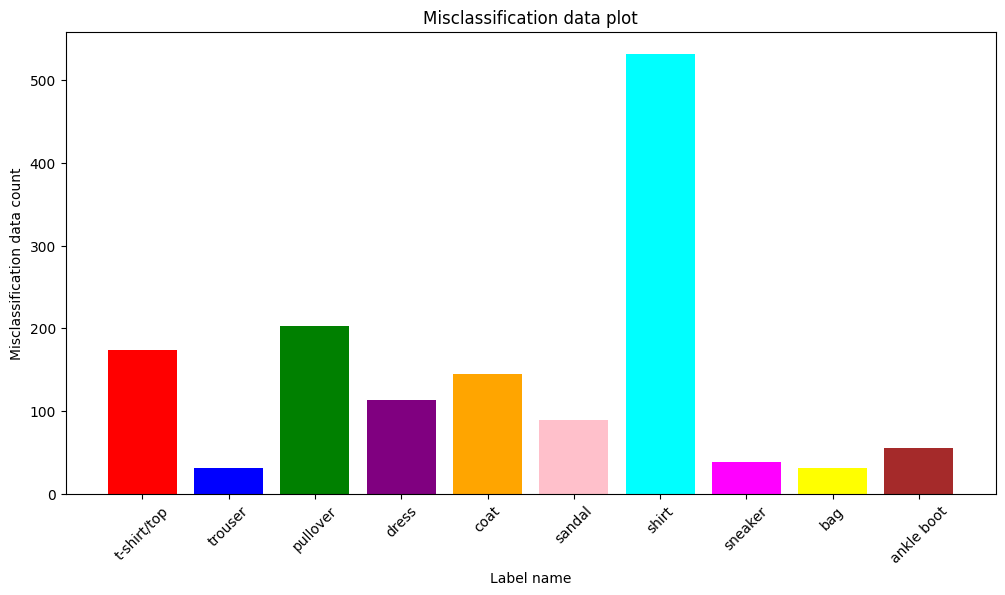

In [19]:
def misclassified_data_plot(net, dataloader, labels_map):
    default_device = "cpu"  # CPU로 설정
    net.eval()  # 평가 모드로 지정
    misclassified_counts = {label: 0 for label in labels_map.values()}  # 처음에 정의한 lables_map에 대한 값에 맞게 0 ~ 9까지 저장 공간 생성

    with torch.no_grad():  # 그라디언트 계산을 하지 않음.
        for features, labels in dataloader:
            features = features.to(default_device)
            labels = labels.to(default_device)

            outputs = net(features)  # 모델에 테스트 데이터를 넣고 값을 예측 받음
            _, predicted = torch.max(outputs, 1)

            # 에측 값이 라벨의 값이랑 다른 값을 찾음.
            misclassified_idx = (predicted != labels).nonzero().squeeze() 

            if misclassified_idx.dim() == 0: # 값이 0차원 인덱스인 경우에는 해당 인덱스만 빼서 저장하도록 처리
                misclassified_idx = [misclassified_idx.item()]

            # 잘못 분류된 이미지의 원래 레이블을 찾아서 +1를 진행하여 count 저장
            for idx in misclassified_idx:
                true_label = labels[idx].item() # 이미지에 해당하는 실제 레이블 즉 어떤 레이블의 이미지를 잘못 예측했는지를 찾음
                misclassified_counts[labels_map[true_label]] += 1 # 해당 이미지의 잘못 예측한 횟수를 +1로 저장

    # 잘못 분류된 카운트를 막대 그래프로 표시합니다.
    labels = list(misclassified_counts.keys()) # 레이블 값
    counts = list(misclassified_counts.values()) # 잘못 분류된 이미지 count 값

    plt.figure(figsize=(12, 6))  # 그래프 크기 설정
    colors = ['red', 'blue', 'green', 'purple', 'orange', 'pink', 'cyan', 'magenta', 'yellow', 'brown'] # 각 막대의 색상 지정
    plt.bar(labels, counts, color=colors)  # 막대 그래프 설정 (각 레이블에 대해 다른 색상 적용)
    plt.xlabel('Label name')  # x축 레이블 설정
    plt.ylabel('Misclassification data count')  # y축 제목 설정
    plt.title('Misclassification data plot')  # 그래프 제목 설정
    plt.xticks(rotation=45)  # x축 레이블을 45도 회전
    plt.show()  # 그래프 출력

# misclassified_data_plot 함수를 호출하여  test_loader의 데이터를 기반으로 예측을 진행한 후 잘못 분류된 결과를 그래프로 출력함
misclassified_data_plot(net, test_loader, labels_map)


 그래프를 통해 각 의류 클래스가 잘못 분류된 이미지의 수를 파악할 수 있다. 각 막대는 특정 의류 종류를 나타내며, 막대의 높이는 해당 의류 클래스에서 발생한 잘못 분류된 이미지의 수를 나타낸다.

이 그래프를 통해 어떤 의류가 모델이 가장 어려워하는지 파악할 수 있다. 예를 들어, 막대 중 가장 높은 것은 어떤 클래스에 해당하는지 확인, 그 클래스는 모델이 가장 자주 혼동하는 클래스일 가능성이 있다. 또한, 다른 클래스들과 비교하여 어떤 클래스가 잘못 분류된 이미지를 더 많이 가지고 있는지도 확인할 수 있다.

11. 클래스별 잘못 분류 비율

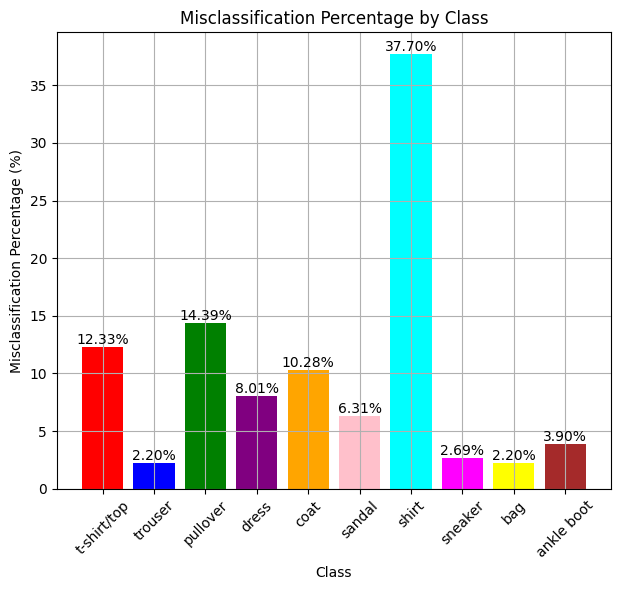

In [20]:
from collections import Counter

# 클래스별로 잘못 분류된 이미지 수 계산
label_counts = Counter(misclassified_labels)

# 클래스별로 정렬된 잘못 분류된 이미지 수 리스트 생성
sorted_label_counts = sorted(label_counts.items(), key=lambda x: x[0])

# 클래스별 잘못 분류된 이미지 비율 계산
total_misclassified = len(misclassified_images)
class_misclassification_percentages = [(labels_map[class_idx], count / total_misclassified * 100) for class_idx, count in sorted_label_counts]

# 그래프로 시각화
plt.figure(figsize=(12, 6))

# 막대 그래프 그리기
plt.subplot(1, 2, 2)
colors = ['red', 'blue', 'green', 'purple', 'orange', 'pink', 'cyan', 'magenta', 'yellow', 'brown'] # 각 막대의 색상 지정
bar_plot = plt.bar([class_name for class_name, _ in class_misclassification_percentages], 
                   [percentage for _, percentage in class_misclassification_percentages], 
                   color=colors)
plt.title('Misclassification Percentage by Class')  # 그래프 제목 설정
plt.xlabel('Class')  # x축 라벨 설정
plt.ylabel('Misclassification Percentage (%)')  # y축 라벨 설정
plt.xticks(rotation=45)  # x축 라벨 회전
plt.grid(True)  # 그리드 표시

# 막대 위에 숫자 표시
for rect, percentage in zip(bar_plot, [percentage for _, percentage in class_misclassification_percentages]):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, f'{percentage:.2f}%', ha='center', va='bottom')  # 막대 위에 숫자 표시

plt.tight_layout()
plt.show()  # 그래프 출력
